In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('DataSet\\auto_clean.csv')
df.head(3)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1


In [3]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [4]:
df['body-style1'] = df['body-style'].replace({  'convertible' : 1,
                                                'hatchback' : 2,
                                                'sedan' : 3,
                                                'wagon' : 4,
                                                'hardtop' : 5})

C:\Users\aariz\AppData\Local\Temp\ipykernel_9620\2952779153.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['body-style1'] = df['body-style'].replace({  'convertible' : 1,


In [5]:
gr = df.groupby('body-style1')[['city-mpg', 'price']].agg('median')
gr

,city-mpg,price
body-style1,,
1,21.0,17084.5
2,26.0,8672.0
3,25.0,11078.5
4,24.0,11694.0
5,23.0,19687.5


In [6]:
%matplotlib widget

C:\Users\aariz\AppData\Local\Temp\ipykernel_9620\2386745132.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'])


Text(0.5, 0.92, 'Change of price with body style and city-mpg')

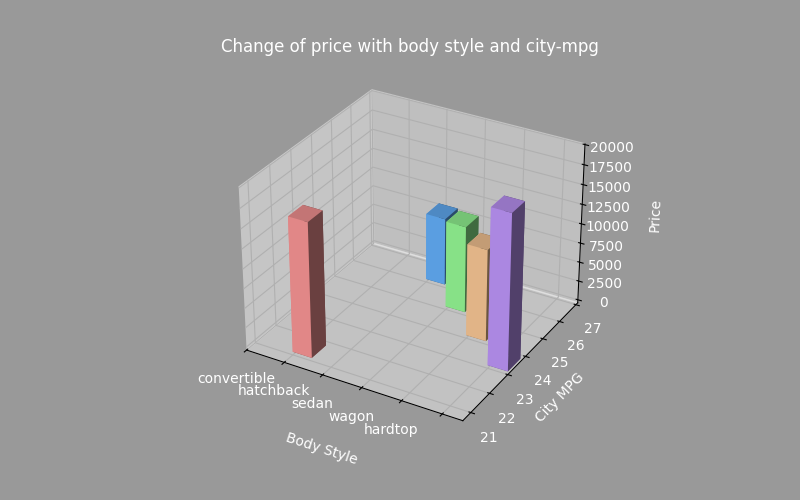

In [7]:
# GRAPH ATTRIBUTES
x = gr.index                                 
y = gr['city-mpg']
z = [0]*5     # [0, 0, 0, 0, 0] all the bars to start from zero

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c299ff']

# BAR ATTRIBUTES
dx = [0.5]*5      # width of the bar (thin)
dy = [0.7]*5      # length of the bar 
dz = gr['price']  # z-axis value

plt.figure(figsize=(8,5))

ax = plt.axes(projection = '3d')
ax.bar3d(x,y,z,dx,dy,dz,color=colors)

ax.set_xticklabels(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'])
ax.set_xlim(0,5.5)                # how many units the x axis will be 

ax.set_xlabel('Body Style', labelpad=12, color='white')
ax.set_ylabel('City MPG', color='white')
ax.set_zlabel('Price', labelpad=12, color='white')

ax.tick_params(axis='x', labelcolor='white')
ax.tick_params(axis='y', labelcolor='white')
ax.tick_params(axis='z', labelcolor='white')

ax.set_facecolor((0.6, 0.6, 0.6, 1))      
plt.gcf().patch.set_facecolor((0.6, 0.6, 0.6, 1))     

ax.set_title("Change of price with body style and city-mpg", color='white')